In [3]:
from IPython.display import Image
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import pandas as pd
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, [0,1,2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  test_size=0.3, random_state=1, stratify=y)
#print (X_train, X_test, y_train, y_test)
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))
print ('Max Depth, Training, Test')
for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.333333333333 0.333333333333
2 0.047619047619 0.0444444444444
3 0.047619047619 0.0444444444444
4 0.047619047619 0.0666666666667
5 0.0285714285714 0.0444444444444


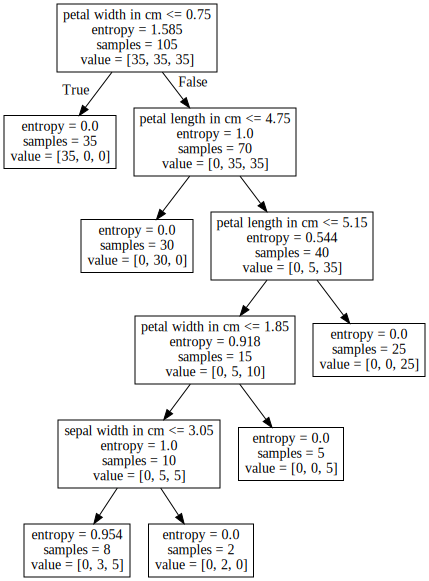

In [4]:
export_graphviz(tree, out_file='T2.dot', feature_names=["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [5]:
# Qizhi Zhao Assginment for week 7 for learning iris dataset